# Final Project - Rizqi Karnadi Video Game Sales


This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

I've decided to choose this Video Games Sales dataset because I believe that this dataset can provide me with the correlation between the video game sales rate and their ranks. I will also provide with further EDA to show how interesing this data is and the capabilities that it has. The fields include but are not limited to :


Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.


My aim in this final project is to isolate the video games in the data set so that only games produced for the computer platform remain and to see how these games have achieved success rates among all games.
I've decided to focus on the PC platform, being a PC master race person myself hehe. All jokes aside, I decided to focus on the computer platform because I'm more interested because of the platform, and to see how these games have achieved success rates among all of the games.

First, we examine the data set we have selected and make a general data discovery:

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.describe(exclude = 'number')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [54]:
df.shape

(16598, 11)

Showing the total row and column counts in a table.

According to the general analysis we have done at this point, we find that there are 16598 different data in 11 columns.

## Data Preprocessing and Filtering

Since the data in the sales values are in decimal, we're gonna normalize these values

In [55]:
df['NA_Sales'] = df['NA_Sales'] * 100
df['EU_Sales'] = df['EU_Sales'] * 100
df['JP_Sales'] = df['JP_Sales'] * 100
df['Other_Sales'] = df['Other_Sales'] * 100
df['Global_Sales'] = df['Global_Sales'] * 100

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,4149.0,2902.0,377.0,846.0,8274.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,2908.0,358.0,681.0,77.0,4024.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,1585.0,1288.0,379.0,331.0,3582.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,1575.0,1101.0,328.0,296.0,3300.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,1127.0,889.0,1022.0,100.0,3137.0


At this point, we do not need to extract a new total attribute by using these records because we have already obtained the sum of the columns NA Sales, EU_Sales, JP_Sales, Other_Sales and Global_Sales.

Since we are interested in the global sales data, we remove the NA/EU/JP sales values from the table.
Now we are going to remove some unnecessary columns and after that we are gonna be displaying 5 random samples :

In [56]:
df = df [['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']]
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
15782,15785,Densha de Go! Shinkansen EX: Sanyou Shinkansen...,Wii,2007.0,Simulation,Taito,2.0
7565,7567,International Cricket 2010,PS3,2010.0,Sports,Codemasters,20.0
14381,14384,Homeworld 2,PC,2003.0,Strategy,Vivendi Games,3.0
885,887,Batman: Arkham Origins,X360,2013.0,Action,Warner Bros. Interactive Entertainment,193.0
8867,8869,Burger Island,Wii,2009.0,Action,Destineer,15.0


From now on, our aim is to select games only from the computer platform, and we will examine the data accordingly.

In [57]:
# Updating table by selecting data from PC
df = df[(df ['Platform'] == 'PC')]
# Displaying new row-column numbers
df.shape

(960, 7)

We see that there are 960 computer games in all data.
Now we check that if the records in the columns we have are not entered/empty values.

In [58]:
# Finding all the empty values and displaying the totals
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year            17
Genre            0
Publisher        6
Global_Sales     0
dtype: int64

We have determined that there are values that are missing in Year and Publisher. Before filling or deleting these values using any method, we are gonna perform filtering operations and then recheck it. In order to examine the distributions of numerical values, we perform histogram graphs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206E90A33C8>]],
      dtype=object)

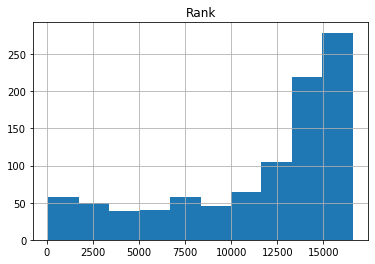

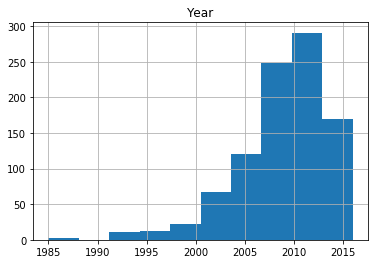

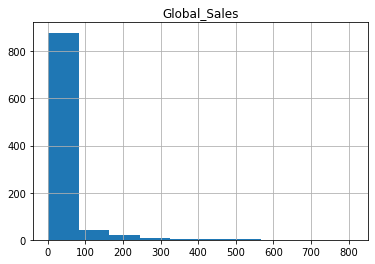

In [59]:
# Written separately to see large scale distributions.
df.hist('Rank')
df.hist('Year')
df.hist('Global_Sales')

While the Histograms show a good distribution of Rank, we see that Year and Global_Sales rates show a much more disproportionate distribution.

At this point, certain filtering is performed for these values.
First of all, we have been filtering the games since 2000 to ensure that the games we are examining are among the times when more modern game technologies started to be used.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206EC29ABE0>]],
      dtype=object)

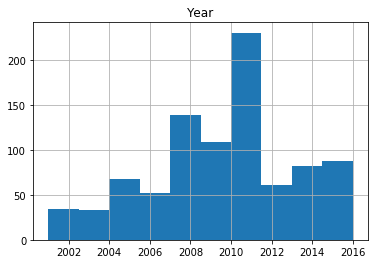

In [63]:
df = df[(df['Year']>2000) & (df['Year']<2019)] 

df.hist('Year')

With the filtering process, we can see that the Year show a more normal/equal distribution than the previous one. It is also still displaying if there are outliers.

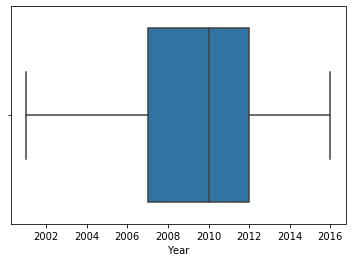

In [64]:
# Examining outlier values
sns.boxplot(x=df['Year'])

Now after filtering our Year, we're gonna be reviewing the new distribution of our global sales values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206EC323748>]],
      dtype=object)

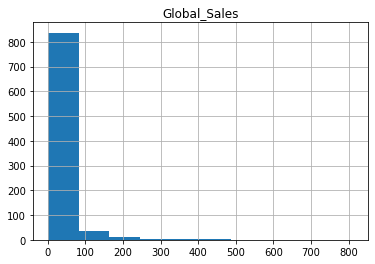

In [65]:
df.hist('Global_Sales')

At this point, we see that the sales values are still stacked to the extreme left, and we examine the outlier values and perform filters in turn.

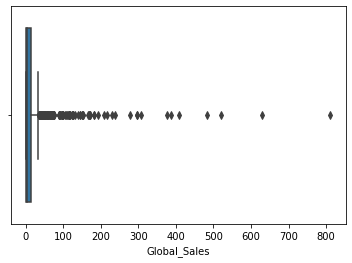

In [66]:
sns.boxplot(x=df['Global_Sales'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206E8C682B0>]],
      dtype=object)

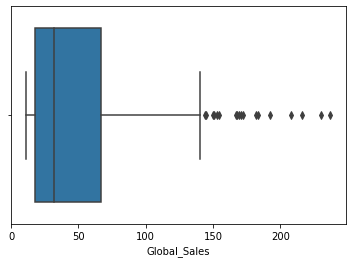

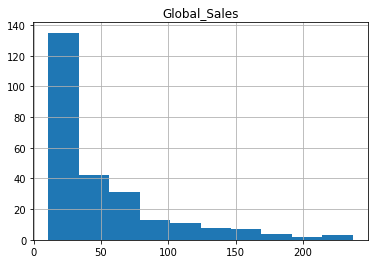

In [67]:
#First filter
df = df[(df['Global_Sales']>10) & (df['Global_Sales']<250)] 
sns.boxplot(x=df['Global_Sales'])
df.hist('Global_Sales')

After the first filtering, we see that the data is still not evenly distributed. In this way, we will find out whether we have lost a lot of data as a result of our filtering.

In [68]:
df.shape

(256, 7)

At this point, we have 256 data left, we plan to perform a filter again and continue here if the data is too low.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206EC516DA0>]],
      dtype=object)

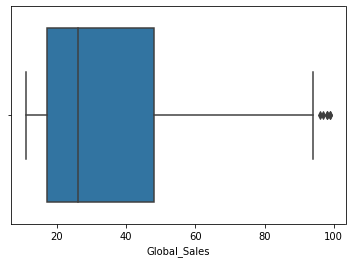

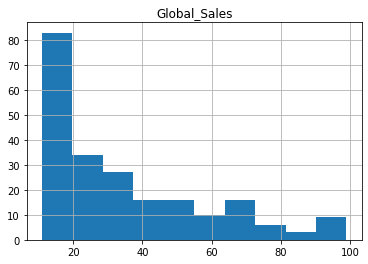

In [69]:
# Second filtering
df = df[(df ['Global_Sales'] <100)]
sns.boxplot(x = df ['Global_Sales'])
df.hist('Global_Sales')

In [70]:
df.shape

(220, 7)

Since we still have enough data after the filtering process, we continue with these records.

At this point our sales values are starting to show a more normal distribution than before and we still have a lot of data.
We have made our data distributions more even for now, and now we check again for empty records.

In [71]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       2
Global_Sales    0
dtype: int64

We see that the values of the empty Year that we found before are gone and the empty values in the Publisher column are reduced to 2.

Since we do not need features such as Genre and Publisher in the assignment we plan to perform, we abstract our table from these two columns instead of filling in empty values within the Publisher.

In [72]:
# The table leaves only the columns we use.
df = df [['Rank', 'Name', 'Platform', 'Year', 'Global_Sales']]

We re-browse our data by sorting by release date.

In [73]:
# Sorting in progress
df = df.sort_values('Year', axis = 0, ascending = True)
df.head(10)

,Rank,Name,Platform,Year,Global_Sales
10005,10007,Stronghold,PC,2001.0,11.0
9516,9518,Warcraft III: Reign of Chaos,PC,2002.0,13.0
7306,7308,EVE Online,PC,2003.0,22.0
9076,9078,Star Wars: Knights of the Old Republic,PC,2003.0,14.0
5919,5921,SimCity 4,PC,2003.0,30.0
5869,5871,The Sims 2,PC,2004.0,30.0
6207,6209,RollerCoaster Tycoon 3,PC,2004.0,28.0
7611,7613,Star Wars: Battlefront,PC,2004.0,20.0
4926,4928,Age of Empires III,PC,2005.0,39.0
2120,2122,Grand Theft Auto: San Andreas,PC,2005.0,98.0


## Explaratory Data Analysis

At this point, we examine the correlation values with all the data available as numerical and heat maps.

In [74]:
# Numerical analysis of relationships
df.corr()

,Rank,Year,Global_Sales
Rank,1.000000,0.016865,-0.937591
Year,0.016865,1.000000,-0.024999
Global_Sales,-0.937591,-0.024999,1.000000


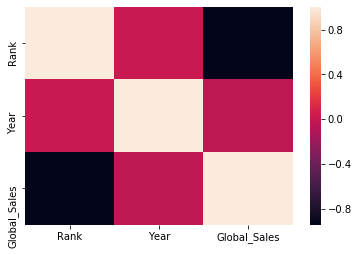

In [75]:
#Heat map
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

As we planned, we see a high relation between the Video Game Global Sales and the ranks.

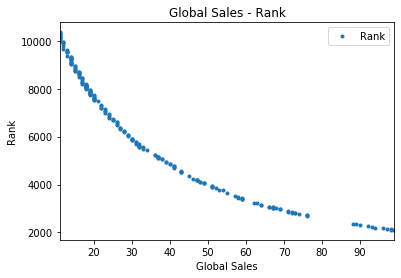

In [76]:
#The drawing of the current relationship is in progress.
df.plot (x = 'Global_Sales', y = 'Rank', style = '.')
plt.title ('Global Sales - Rank')
plt.xlabel ('Global Sales')
plt.ylabel ('Rank')
plt.show ()

## Learning Models

After completing our data analysis/data exploration, we will apply two learning models using these two highly correlated columns and examine their achievements.

In [77]:
x = df.iloc[:,4].values.reshape(-1,1) #The Values in the Global_Sales column x
y = df.iloc[:,0].values.reshape(-1,1) #The values in the Rank column Y

Now, we split the x and y columns we have as test and training sets.

The test set is set to 30%.

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

First, we will perform our operations using the Linear Regression model and examine the success of this model

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr =LinearRegression()

# Linear Regression Model Training
lr.fit(x_train, y_train.ravel())

#Model predictions are defined as y_pred
y_pred = lr.predict(x_test)

In [81]:
print ('Breakpoint:', lr.intercept_)
print ('Slope:', lr.coef_)

Breakpoint: 9738.803340760074
Slope: [-99.03227132]


We examine and compare the predicted values and the known real results on the table obtained from the training performed with the Linear Regression model.

In [82]:
#Test data and Forecasting
LRegressionTable = pd.DataFrame({'Real': y_test.ravel(), 'Prediction': y_pred.ravel()})
LRegressionTable

,Real,Prediction
0,7201,7560.093372
1,9948,8550.416085
2,4194,5084.286589
3,3072,3202.673433
4,3036,3103.641162
5,9372,8451.383814
6,7763,7857.190186
7,5788,6668.802930
8,9252,8352.351542
9,3938,4688.157503


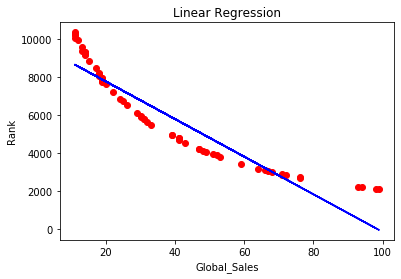

In [83]:
# Predictions and real values plotted.
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Global_Sales')
plt.ylabel('Rank')
plt.show()

We examine the success criteria of the linear regression algorithm, MSE and RMSE.

In [84]:
#Success criteria for regression
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  742.3845074868981
Mean Squared Error:  829972.9528321251
Root Mean Squared Error:  911.0285137316642


To see the overall success of the Linear Regression algorithm, we take a look at its score.

In [85]:
# Success criteria
print ('Linear Regression Success:',r2_score(y_test, y_pred))

Linear Regression Success: 0.8736067345191783


We can see that the Linear Regression Algorithm achieved 87% success.

We will now examine whether we can achieve a higher result by applying another learning model.

Now we will use the Naive Bayes algorithm.

First, the test and training clusters are re-selected to take different values.

In [86]:
# For NB
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)

In [87]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=seed) #Kfold model is preferred.
cv_results = model_selection.cross_val_score(nb, X_train, Y_train, cv=kfold, scoring=scoring)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=0)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [88]:
# Naive Bayes - Gaussian Naive Bayes Model Training
nb.fit(x_train2, y_train2)
#Modelin predictions defined as y_pred
y_pred2 = nb.predict(x_test2)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We analyze and compare the predicted values with the known actual results on the table.

In [89]:
NBayesTable = pd.DataFrame({'Real': y_test2.ravel (), 'Prediction': y_pred2.ravel ()})
NBayesTable

,Real,Prediction
0,7201,7213
1,9948,9678
2,4194,4203
3,3072,3075
4,3036,3028
5,9372,9518
6,7763,7770
7,5788,5702
8,9252,9037
9,3938,3880


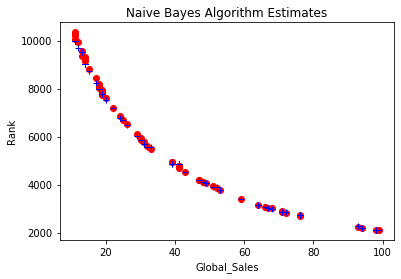

In [90]:
#NB prediction and real values are plotted.
plt.scatter(x_test2, y_test2, color = 'red')
plt.plot(x_test2, y_pred2, 'b +')
plt.title('Naive Bayes Algorithm Estimates')
plt.xlabel('Global_Sales')
plt.ylabel('Rank')
plt.show()

In our analysis, we can see that there are richer estimates when Naive Bayes is used than the estimates in the Linear Regression.

We examined the Linear Regression model with MSE and RMSE criteria. In Naive Bayes, we use the Complexity matrix, ACC, Precision, Recall.

In [91]:
# NB criteria being examined
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))
# Accuracy score
from sklearn.metrics import accuracy_score
print('ACC: ',accuracy_score(y_pred2,y_test2))

              precision    recall  f1-score   support

        2104       0.00      0.00      0.00       0.0
        2105       0.00      0.00      0.00       1.0
        2108       0.00      0.00      0.00       1.0
        2122       0.00      0.00      0.00       0.0
        2170       0.00      0.00      0.00       0.0
        2204       0.00      0.00      0.00       1.0
        2226       0.00      0.00      0.00       1.0
        2262       0.00      0.00      0.00       0.0
        2701       0.00      0.00      0.00       1.0
        2714       0.00      0.00      0.00       0.0
        2730       0.00      0.00      0.00       1.0
        2826       0.00      0.00      0.00       1.0
        2857       0.00      0.00      0.00       0.0
        2858       0.00      0.00      0.00       1.0
        2891       0.00      0.00      0.00       1.0
        2963       0.00      0.00      0.00       0.0
        3003       0.00      0.00      0.00       1.0
        3028       0.00    

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


To see the overall success of the Naive Bayes algorithm, we take a look at its Score.

In [92]:
print('Naive Bayes Success: ',r2_score(y_test2, y_pred2))

Naive Bayes Success:  0.9978502984463148


The Naive Bayes Algorithm seems to have achieved a success of 99%.

## Additional Models

We're taking a look at 2 different models in general :

If we applied the Decision Tree model, let's see the success score.

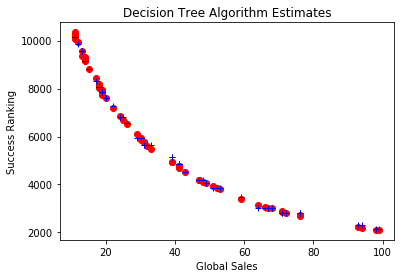

Success Score: 0.9986354566446809


In [93]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.3, random_state=0)
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 5)

dtr.fit(x_train3, y_train3)
y_pred3 = dtr.predict(x_test3)

plt.scatter(x_test3, y_test3, color='red')
plt.plot(x_test3, y_pred3 ,'b+')
plt.title('Decision Tree Algorithm Estimates')
plt.xlabel ('Global Sales')
plt.ylabel ('Success Ranking')
plt.show ()

print ('Success Score:',r2_score(y_test3, y_pred3))

We have seen that Decision Trees can get 99% success points.

In [94]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)

x_poly = pr.fit_transform(x_train4)

# Linear Regression Model Training
pr.fit(x_poly, y_train4)

lr2 = LinearRegression()

# Linear Regression Model Training
lr2.fit(x_poly, y_train4.ravel())

#Model predictions are defined as y_pred.
y_pred4 = lr2.predict(pr.fit_transform(x_test4))


#Test data and Forecasting
PRegressionTable = pd.DataFrame({'Real':y_test4.ravel(),'Predict':y_pred4.ravel()})
PRegressionTable.head()

,Real,Predict
0,7201,7502.489295
1,9948,9360.223356
2,4194,4107.903000
3,3072,2722.063183
4,3036,2677.689933


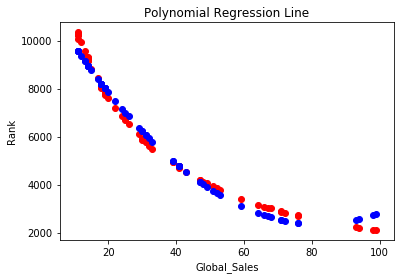

In [95]:
plt.scatter (x_test4, y_test4, color = 'red')
plt.scatter (x_test4, y_pred4.ravel (), color = "blue")
plt.title ('Polynomial Regression Line')
plt.xlabel ('Global_Sales')
plt.ylabel ('Rank')
plt.show ()

In [96]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test4,y_pred4))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test4,y_pred4))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test4,y_pred4)))

print('Polynomial Regression Success: ',r2_score(y_test4, y_pred4))

Mean Absolute Error:  269.38028477882756
Mean Squared Error:  105829.86640333768
Root Mean Squared Error:  325.3150264026205
Polynomial Regression Success:  0.9838835924056643


## RESULT

When we examine the results obtained in the two learning models, Linear Regression and Naive Bayes Algorithms, in terms of tables and visuals, we conclude that the Naive Bayes - Gaussian NB algorithm is a more suitable model for the training of our data set when we compare the degrees of success.
Naive Bayes can achieve 99% successful results, while this rate remains at 87% in Linear Regression. With the additional models though, it's shown that the Decision Tree model is a contender with it having 99% successful results AND the fact it doesn't have errors puts the validity of the model higher than the Naive Bayes one, but there's also Polynomial Regression coming in second with 98% without having errors.


Results in 4 different models:

Linear Regression: 87%

Naive Bayes: 99% - w/ Errors

Decision Tree: 99%

Polynomial Regression: 98%